In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# file path
path = r'/Users/elliothaigh/05-2023 Instacart Basket Analysis'

In [4]:
# import data set
cus_ords_prods =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merge.pkl'))

In [5]:
# drop first_name and last_name due to PII data concerns
cus_ords_prods = cus_ords_prods.drop(columns=['first_name', 'last_name'])

In [6]:
cus_ords_prods.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,spend_flag,avg_days,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
# defining regions based on state geographical location
region=[]
for value in cus_ords_prods['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [8]:
# create new column for region
cus_ords_prods['region'] = region

In [9]:
# create cross tab for region and spend flag
region_spend_crosstab = pd.crosstab(cus_ords_prods['region'], cus_ords_prods['spend_flag'], dropna = False)

In [10]:
region_spend_crosstab

spend_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [11]:
# create new column customer_activity to identify low-activity customers
cus_ords_prods.loc[cus_ords_prods['max_order']>=5,'customer_activity']='High-activity customer'
cus_ords_prods.loc[cus_ords_prods['max_order']<5,'customer_activity']='Low-activity customer'

In [13]:
# Subset for High-activity customers
df_high_act_cus=cus_ords_prods[cus_ords_prods['customer_activity']=='High-activity customer']

In [15]:
# export high order customer
df_high_act_cus.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_high_act_cus.pkl'))

In [17]:

cus_ords_prod.columns

Index(['user_id', 'sex', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_order',
       'spend_flag', 'avg_days', 'frequency_flag', '_merge', 'region',
       'customer_activity'],
      dtype='object')

# Profiling

# Age

In [29]:
# age statistics
cus_ords_prods['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [145]:
# Create groups for age profile Young adult - 35 and Under, Middle-aged 36 - 60 and Elderly over 60
cus_ords_prods.loc[cus_ords_prods['age'] >= 35 & (cus_ords_prods['age'] < 60), 'age_group'] = 'Middle-aged'
cus_ords_prods.loc[cus_ords_prods['age']<35,'age_group']='Young adult'
cus_ords_prods.loc[cus_ords_prods['age']>= 60,'age_group']='Elderly'

In [146]:
cus_ords_prods['age_group'].value_counts()

Middle-aged    12709949
Elderly        11067255
Young adult     8627655
Name: age_group, dtype: int64

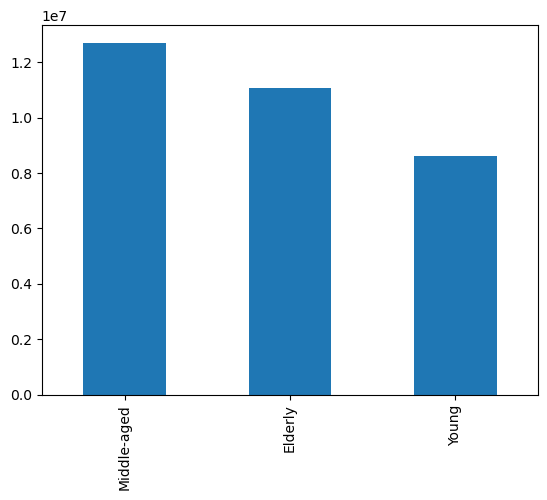

In [233]:
age_bar = df_master['age_group'].value_counts().plot.bar()

In [237]:
# Save Viz
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'), bbox_inches='tight')

In [137]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_master.groupby('age_group').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
age_group                                                                  
Elderly                       30.0  11.092552  0.0  99999.0  11.763336  1.0
Middle-aged                   30.0  11.102800  0.0  99999.0  12.037566  1.0
Young                         30.0  11.120753  0.0  99999.0  12.173973  1.0

In [138]:
region_age=pd.crosstab(df_master['region'],df_master['age_group'],dropna=False)

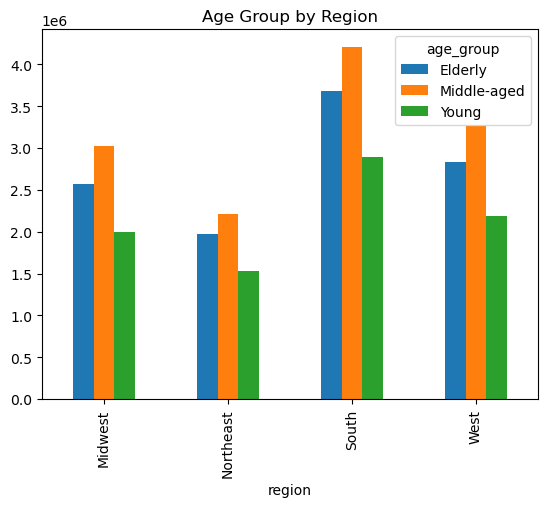

In [154]:
# create a bar chart between age and region
regions_age=region_age.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [ ]:
# The age groups appear to be fairly evenly distibuted across the four regions. The most populated region is the South and the least populated is the Northeast. In each region the middle-aged group represents the largest group followed by the elderly and then young-adults.

In [239]:
# Save Viz
regions_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_age.png'),bbox_inches='tight')

In [180]:
# creating a crosstab between department and age
department_age=pd.crosstab(df_master['department'],df_master['age_group'],dropna=False,)

In [187]:
department_age = department_age.sort_values(by=['Elderly'], ascending=True)

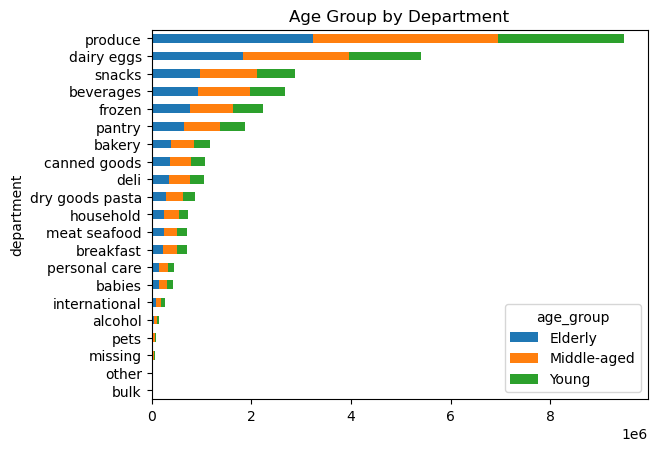

In [188]:
# create a bar chart between age and region
department_age_viz=department_age.plot.barh(stacked=True)
plt.title('Age Group by Department')
plt.show()

In [240]:
# Save Viz
department_age_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_age.png'),bbox_inches='tight')

# Income

In [153]:
cus_ords_prods['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
# create new column income_level to profile customers income level
cus_ords_prods.loc[cus_ords_prods['income'] >= 40000 & (cus_ords_prods['income'] < 80000), 'income_level'] = 'Moderate-income'
cus_ords_prods.loc[cus_ords_prods['income']<40000,'income_level']='Low-income'
cus_ords_prods.loc[cus_ords_prods['income']>= 80000,'income_level']='High-income'

In [28]:
# value counts for income groups
cus_ords_prods['income_level'].value_counts()

High-income        20831060
Moderate-income     9846601
Low-income          1727198
Name: income_level, dtype: int64

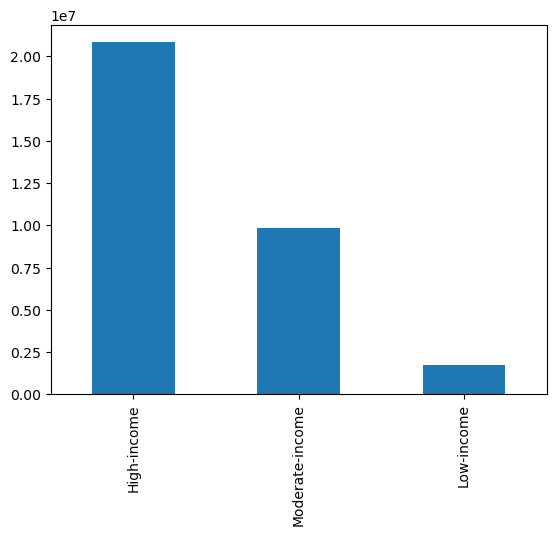

In [221]:
income_bar = df_master['income_level'].value_counts().plot.bar()

In [241]:
# Save Viz
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'),bbox_inches='tight')

In [116]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_master.groupby('income_level').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices             \
                                   max       mean  min      max       mean   
income_level                                                                 
High-income                       30.0  11.045033  0.0  99999.0  14.473231   
Low-income                        30.0  11.686944  0.0     25.0   6.495264   
Moderate-income                   30.0  11.128019  0.0  14900.0   7.668248   

                      
                 min  
income_level          
High-income      1.0  
Low-income       1.0  
Moderate-income  1.0

In [196]:
# Create crosstab
region_income=pd.crosstab(df_master['region'],df_master['income_level'], dropna=False)

In [201]:
region_income = region_income.reindex(['Low-income', 'Moderate-income', 'High-income'], 
     axis="columns")

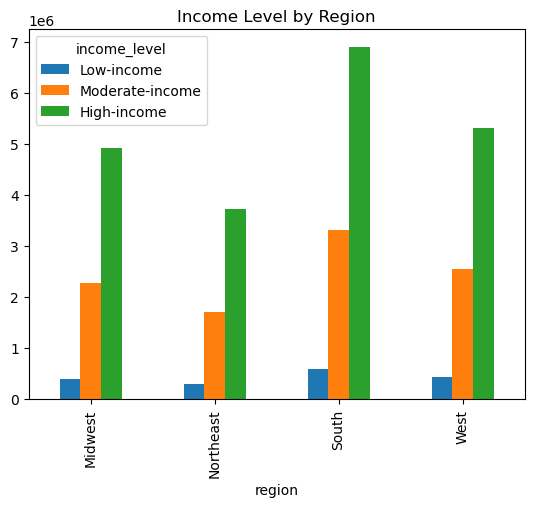

In [202]:
# create a bar chart between age and region
regions_income_viz=region_income.plot.bar()
plt.title('Income Level by Region')
plt.show()

In [ ]:
# The high-income group is the largest across each region but a large distance. This is followed by moderate-income and then low-income.

In [242]:
# Save Viz
regions_income_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income_bar.png'),bbox_inches='tight')

In [203]:
# creating a crosstab between department and income
department_income=pd.crosstab(df_master['department'],df_master['income_level'],dropna=False,)

In [207]:
department_income = department_income.sort_values(by=['Moderate-income'], ascending=True)

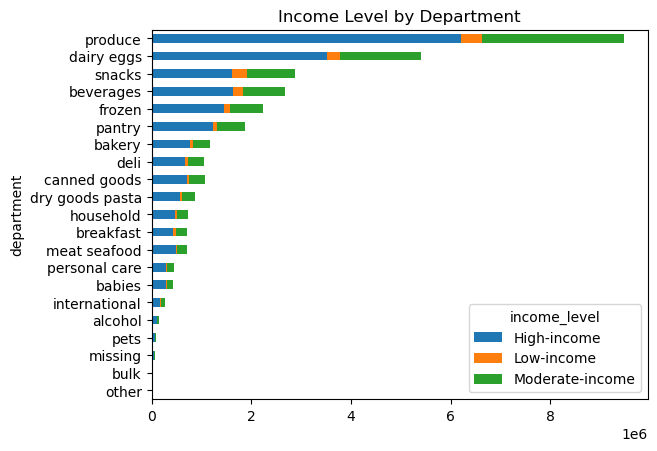

In [208]:
# create a bar chart between income and department
department_income_viz=department_income.plot.barh(stacked=True)
plt.title('Income Level by Department')
plt.show()

In [243]:
# Save Viz
department_income_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_income_bar.png'),bbox_inches='tight')

# Goods and Departments

In [35]:
# import departments_wrangled
departments =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [41]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [43]:
# remane Unnamed: 0 to department_id
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [44]:
# merge department dataset with cus_ords_prods
df_master =cus_ords_prods.merge(departments,on='department_id')

In [65]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


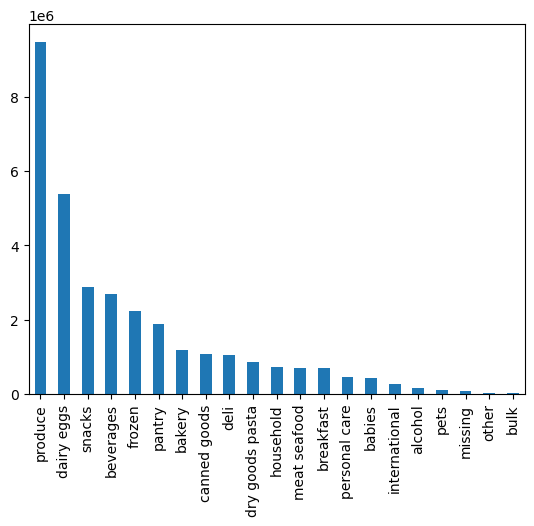

In [226]:
department_bar = df_master['department'].value_counts().plot.bar()

In [244]:
# Save Viz
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'),bbox_inches='tight')

Profile - Alcohol Flag

In [75]:
# to profile customers who are alcohol consuners we will create a flag 
df_master.loc[df_master['department_id'] == 5, 'alcohol_customer'] = 'alcohol consumer'

In [76]:
df_master.loc[df_master['department_id'] != 5, 'alcohol_customer'] = 'non-alcohol consumer'

In [77]:
# identify customers who are alcohol consumers
inconsistent_values = df_master.loc[df_master['alcohol_customer'] == 'alcohol consumer', 'user_id'].unique()

In [112]:
# update alcohol_customer column
df_master.loc[df_master['user_id'].isin(inconsistent_values), 'alcohol_customer'] = 'alcohol consumer'

In [113]:
df_master['alcohol_customer'].value_counts()

non-alcohol consumer    29991046
alcohol consumer         2413813
Name: alcohol_customer, dtype: int64

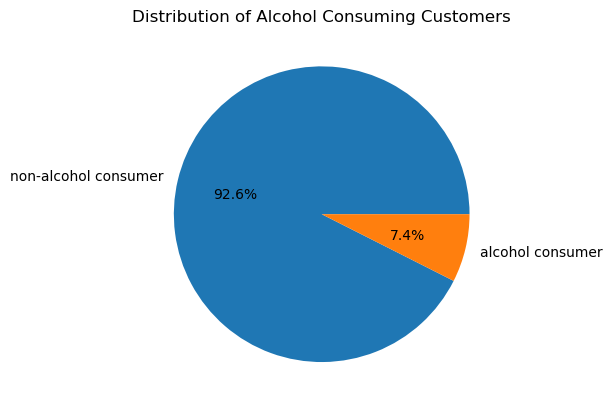

In [114]:
alcohol_pie = df_master['alcohol_customer'].value_counts().plot.pie(title = 'Distribution of Alcohol Consuming Customers', label = '', autopct='%1.1f%%')

In [245]:
# Save Viz
alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_pie.png'),bbox_inches='tight')

In [118]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_master.groupby('alcohol_customer').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices  \
                                        max       mean  min      max   
alcohol_customer                                                       
alcohol consumer                       30.0  10.885580  0.0  99999.0   
non-alcohol consumer                   30.0  11.121688  0.0  99999.0   

                                      
                           mean  min  
alcohol_customer                      
alcohol consumer      23.431691  1.0  
non-alcohol consumer  11.058561  1.0

In [209]:
region_alcohol=pd.crosstab(df_master['region'],df_master['alcohol_customer'], dropna=False)

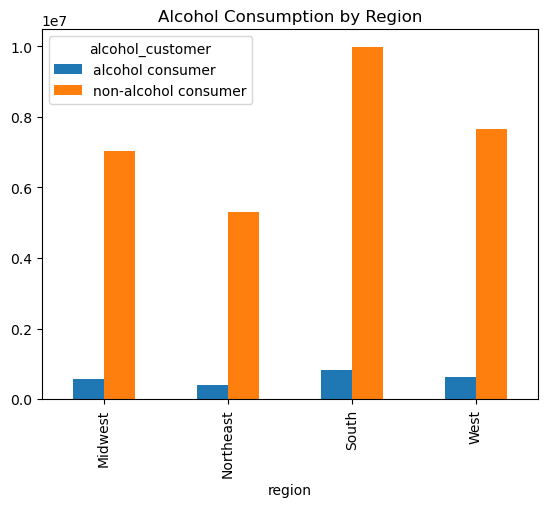

In [210]:
# create a bar chart between age and region
regions_alcohol_viz=region_alcohol.plot.bar()
plt.title('Alcohol Consumption by Region')
plt.show()

In [246]:
# Save Viz
regions_alcohol_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_alcohol_bar.png'),bbox_inches='tight')

In [ ]:
# There are far more non-alcohol consumers than alcohol consumers. As a 

# Dependants

In [103]:
# create status_flag for each customer: 
df_master.loc[(df_master['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_master['n_dependants']==0), 'family_flag'] = 'single no dependants'
df_master.loc[(df_master['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_master['n_dependants'] >=1), 'family_flag'] = 'single with dependants'
df_master.loc[(df_master['fam_status'] == 'married') & (df_master['n_dependants'] == 1), 'family_flag'] = 'married no dependants'
df_master.loc[(df_master['fam_status'] == 'married') & (df_master['n_dependants'] > 1), 'family_flag'] = 'married with dependants'

In [104]:
df_master['family_flag'].value_counts()

married with dependants    15205849
single no dependants        8097503
married no dependants       7550904
single with dependants      1550603
Name: family_flag, dtype: int64

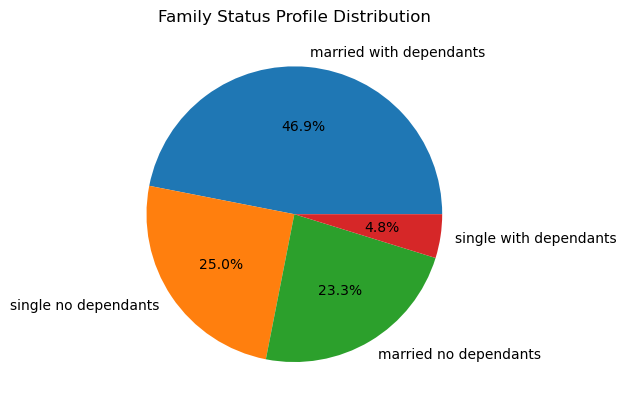

In [108]:
family_flag_pie = df_master['family_flag'].value_counts().plot.pie(title = 'Family Status Profile Distribution', label = '', autopct='%1.1f%%')

In [247]:
# Save Viz
family_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_flag_pie.png'),bbox_inches='tight')

In [119]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_master.groupby('family_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                   prices  \
                                           max       mean  min      max   
family_flag                                                               
married no dependants                     30.0  11.113141  0.0  99999.0   
married with dependants                   30.0  11.117681  0.0  99999.0   
single no dependants                      30.0  11.080805  0.0  99999.0   
single with dependants                    30.0  11.048170  0.0  99999.0   

                                         
                              mean  min  
family_flag                              
married no dependants    11.705834  1.0  
married with dependants  12.154546  1.0  
single no dependants     12.129243  1.0  
single with dependants   10.828768  1.0

In [211]:
region_family=pd.crosstab(df_master['region'],df_master['family_flag'], dropna=False)

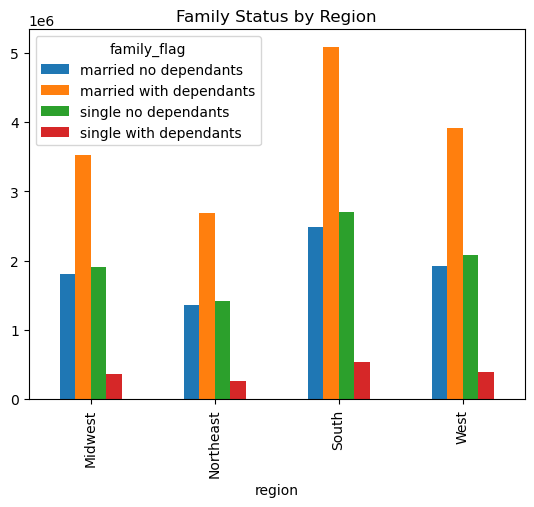

In [212]:
# create a bar chart between age and region
regions_family_viz=region_family.plot.bar()
plt.title('Family Status by Region')
plt.show()

In [248]:
 # Save Viz
regions_family_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_family_bar.png'),bbox_inches='tight')

In [213]:
# creating a crosstab between department and income
department_family=pd.crosstab(df_master['department'],df_master['family_flag'],dropna=False,)

In [214]:
department_family = department_family.sort_values(by=['married with dependants'], ascending=True)

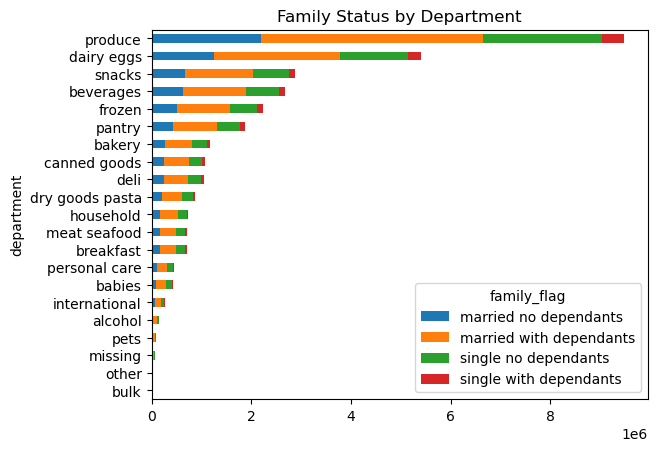

In [215]:
# create a bar chart between income and department
department_family_viz=department_family.plot.barh(stacked=True)
plt.title('Family Status by Department')
plt.show()

In [282]:
# Save Viz
department_family_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_family_bar.png'),bbox_inches='tight')

In [234]:
df_master.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_master_4.10.pkl'))